#### Importing the libraries

In [278]:
import os                               
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [279]:
from sklearn.decomposition import PCA as pca
from sklearn.decomposition import FactorAnalysis as fact
from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer
from varclushi import VarClusHi

In [280]:
#For the tree
from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

#For displaying the tree
from sklearn.externals.six import StringIO
from IPython.display import Image, display

#Neural Network
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Multiple Regression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

#importing interpretable machine learning
import eli5

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt


In [281]:
#changing jupyter notebook display size
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Loading the data file

In [282]:
#changing the working directory
os.chdir(r'C:\Users\Anirud Vem\Desktop\Faulty steel plates')

In [283]:
#loading the data file
df_steel = pd.read_csv('faults.CSV')

In [284]:
df_steel.head()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  Other_Faults
0         42         50     270900     270944           267           17           44              24220                     76                    108                1687                 1                 0                     80       0.0498       0.2415        0.1818           0.0047         0.4706         1.0000                   1.0      2.4265       0.9031       1.6435             0.8182           -0.2913          0.5822       1          0         0       0          0      0             0
1        645        651    2538079    2538108           108           10           30              11397                     84                    123                1687                 1                 0                     80       0.7647       0.3793        0.2069           0.0036         0.6000         0.9667                   1.0      2.0334       0.7782       1.4624             0.7931           -0.1756          0.2984       1          0         0       0          0      0             0
2        829        835    1553913    1553931            71            8           19               7972                     99                    125                1623                 1                 0                    100       0.9710       0.3426        0.3333           0.0037         0.7500         0.9474                   1.0      1.8513       0.7782       1.2553             0.6667           -0.1228          0.2150       1          0         0       0          0      0             0
3        853        860     369370     369415           176           13           45              18996                     99                    126                1353                 0                 1                    290       0.7287       0.4413        0.1556           0.0052         0.5385         1.0000                   1.0      2.2455       0.8451       1.6532             0.8444           -0.1568          0.5212       1          0         0       0          0      0             0
4       1289       1306     498078     498335          2409           60          260             246930                     37                    126                1353                 0                 1                    185       0.0695       0.4486        0.0662           0.0126         0.2833         0.9885                   1.0      3.3818       1.2305       2.4099             0.9338           -0.1992          1.0000       1          0         0       0          0      0             0

In [285]:
df_steel.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], dtype='object')

In [286]:
#shape of the data file
df_steel.shape

(1941, 34)

### Describing the data

In [287]:
df_steel.describe().T

count          mean           std        min          25%           50%           75%           max
X_Minimum              1941.0  5.711360e+02  5.206907e+02     0.0000      51.0000  4.350000e+02  1.053000e+03  1.705000e+03
X_Maximum              1941.0  6.179645e+02  4.976274e+02     4.0000     192.0000  4.670000e+02  1.072000e+03  1.713000e+03
Y_Minimum              1941.0  1.650685e+06  1.774578e+06  6712.0000  471253.0000  1.204128e+06  2.183073e+06  1.298766e+07
Y_Maximum              1941.0  1.650739e+06  1.774590e+06  6724.0000  471281.0000  1.204136e+06  2.183084e+06  1.298769e+07
Pixels_Areas           1941.0  1.893878e+03  5.168460e+03     2.0000      84.0000  1.740000e+02  8.220000e+02  1.526550e+05
X_Perimeter            1941.0  1.118552e+02  3.012092e+02     2.0000      15.0000  2.600000e+01  8.400000e+01  1.044900e+04
Y_Perimeter            1941.0  8.296600e+01  4.264829e+02     1.0000      13.0000  2.500000e+01  8.300000e+01  1.815200e+04
Sum_of_Luminosity      1941.0  2.063121e+05  5.122936e+05   250.0000    9522.0000  1.920200e+04  8.301100e+04  1.159141e+07
Minimum_of_Luminosity  1941.0  8.454869e+01  3.213428e+01     0.0000      63.0000  9.000000e+01  1.060000e+02  2.030000e+02
Maximum_of_Luminosity  1941.0  1.301937e+02  1.869099e+01    37.0000     124.0000  1.270000e+02  1.400000e+02  2.530000e+02
Length_of_Conveyer     1941.0  1.459160e+03  1.445778e+02  1227.0000    1358.0000  1.364000e+03  1.650000e+03  1.794000e+03
TypeOfSteel_A300       1941.0  4.003091e-01  4.900872e-01     0.0000       0.0000  0.000000e+00  1.000000e+00  1.000000e+00
TypeOfSteel_A400       1941.0  5.996909e-01  4.900872e-01     0.0000       0.0000  1.000000e+00  1.000000e+00  1.000000e+00
Steel_Plate_Thickness  1941.0  7.873776e+01  5.508603e+01    40.0000      40.0000  7.000000e+01  8.000000e+01  3.000000e+02
Edges_Index            1941.0  3.317152e-01  2.997117e-01     0.0000       0.0604  2.273000e-01  5.738000e-01  9.952000e-01
Empty_Index            1941.0  4.142033e-01  1.372615e-01     0.0000       0.3158  4.121000e-01  5.016000e-01  9.439000e-01
Square_Index           1941.0  5.707671e-01  2.710584e-01     0.0083       0.3613  5.556000e-01  8.182000e-01  1.000000e+00
Outside_X_Index        1941.0  3.336110e-02  5.896117e-02     0.0015       0.0066  1.010000e-02  2.350000e-02  8.759000e-01
Edges_X_Index          1941.0  6.105286e-01  2.432769e-01     0.0144       0.4118  6.364000e-01  8.000000e-01  1.000000e+00
Edges_Y_Index          1941.0  8.134722e-01  2.342736e-01     0.0484       0.5968  9.474000e-01  1.000000e+00  1.000000e+00
Outside_Global_Index   1941.0  5.757342e-01  4.823520e-01     0.0000       0.0000  1.000000e+00  1.000000e+00  1.000000e+00
LogOfAreas             1941.0  2.492388e+00  7.889299e-01     0.3010       1.9243  2.240600e+00  2.914900e+00  5.183700e+00
Log_X_Index            1941.0  1.335686e+00  4.816116e-01     0.3010       1.0000  1.176100e+00  1.518500e+00  3.074100e+00
Log_Y_Index            1941.0  1.403271e+00  4.543452e-01     0.0000       1.0792  1.322200e+00  1.732400e+00  4.258700e+00
Orientation_Index      1941.0  8.328764e-02  5.008680e-01    -0.9910      -0.3333  9.520000e-02  5.116000e-01  9.917000e-01
Luminosity_Index       1941.0 -1.313050e-01  1.487668e-01    -0.9989      -0.1950 -1.330000e-01 -6.660000e-02  6.421000e-01
SigmoidOfAreas         1941.0  5.854205e-01  3.394518e-01     0.1190       0.2482  5.063000e-01  9.998000e-01  1.000000e+00
Pastry                 1941.0  8.140134e-02  2.735209e-01     0.0000       0.0000  0.000000e+00  0.000000e+00  1.000000e+00
Z_Scratch              1941.0  9.788769e-02  2.972393e-01     0.0000       0.0000  0.000000e+00  0.000000e+00  1.000000e+00
K_Scatch               1941.0  2.014426e-01  4.011812e-01     0.0000       0.0000  0.000000e+00  0.000000e+00  1.000000e+00
Stains                 1941.0  3.709428e-02  1.890415e-01     0.0000       0.0000  0.000000e+00  0.000000e+00  1.000000e+00
Dirtiness              1941.0  2.833591e-02  1.659734e-0

In [288]:
df_steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

##### Missing value detection

In [289]:
#missing value detection
df_steel.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

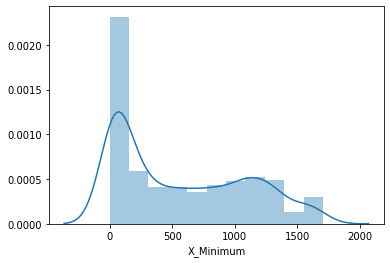

In [290]:
sns.distplot(df_steel.X_Minimum )

##### Plotting the histograms for all the variables to detect outliers and data distributions

Variable Name: X_Minimum


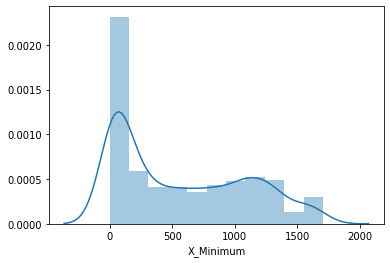

Variable Name: X_Maximum


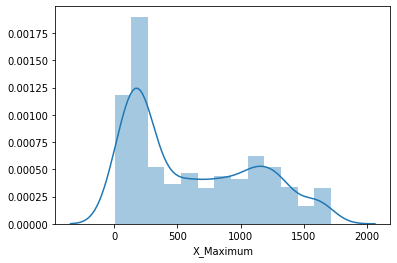

Variable Name: Y_Minimum


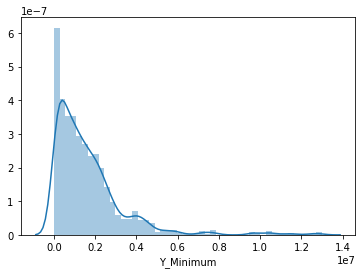

Variable Name: Y_Maximum


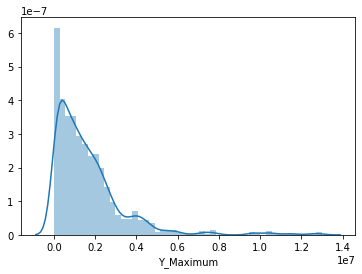

Variable Name: Pixels_Areas


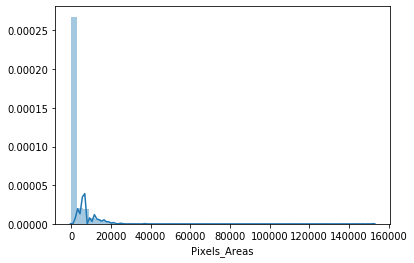

Variable Name: X_Perimeter


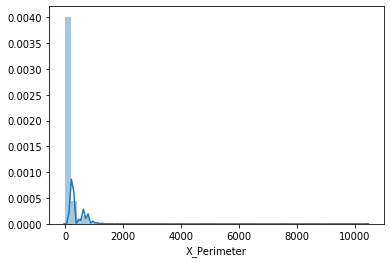

Variable Name: Y_Perimeter


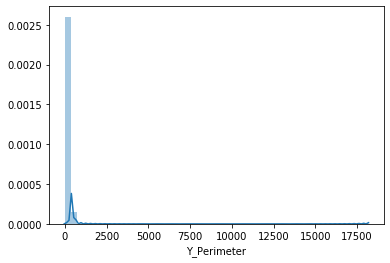

Variable Name: Sum_of_Luminosity


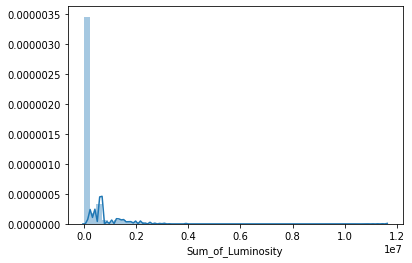

Variable Name: Minimum_of_Luminosity


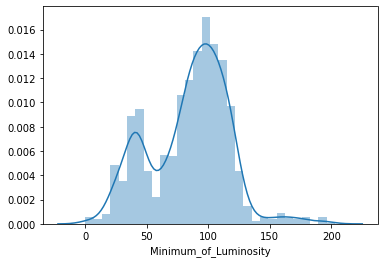

Variable Name: Maximum_of_Luminosity


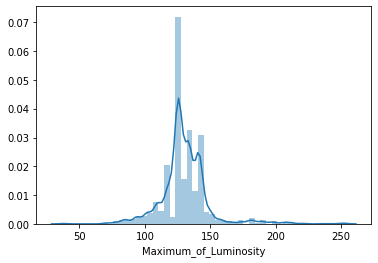

Variable Name: Length_of_Conveyer


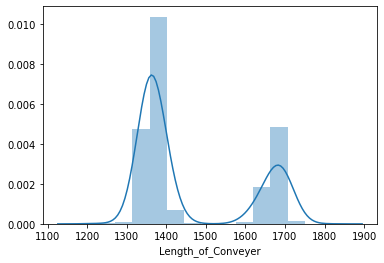

Variable Name: TypeOfSteel_A300


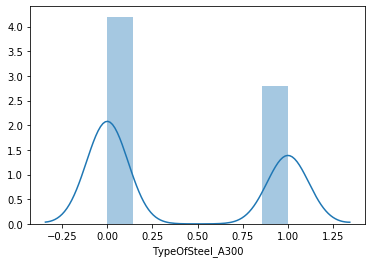

Variable Name: TypeOfSteel_A400


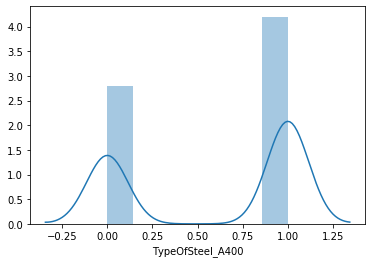

Variable Name: Steel_Plate_Thickness


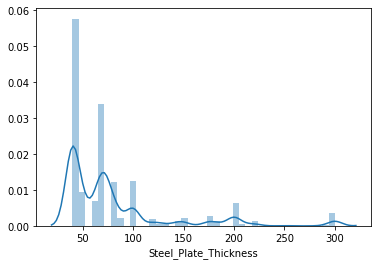

Variable Name: Edges_Index


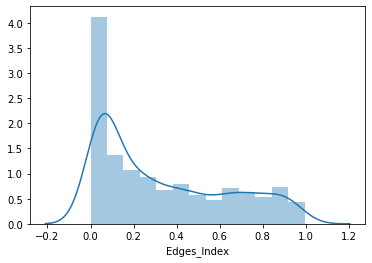

Variable Name: Empty_Index


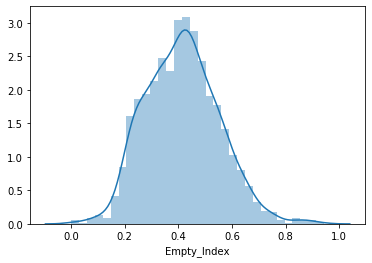

Variable Name: Square_Index


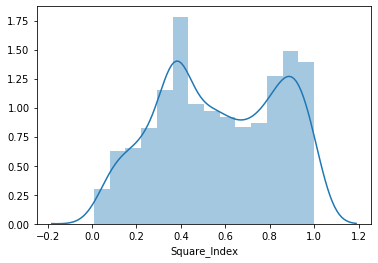

Variable Name: Outside_X_Index


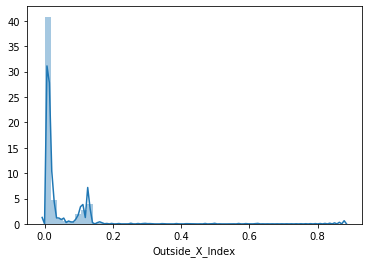

Variable Name: Edges_X_Index


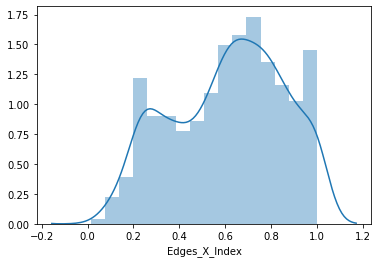

Variable Name: Edges_Y_Index


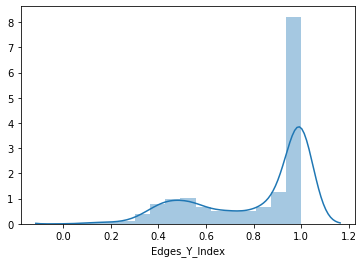

Variable Name: Outside_Global_Index


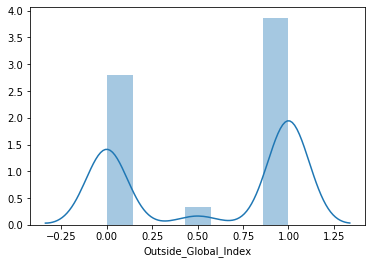

Variable Name: LogOfAreas


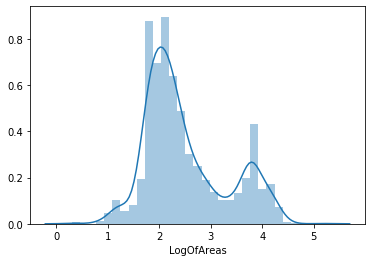

Variable Name: Log_X_Index


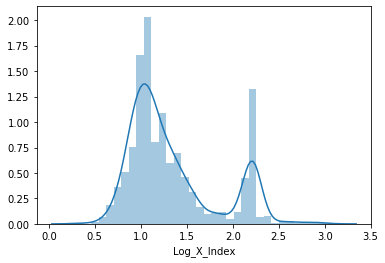

Variable Name: Log_Y_Index


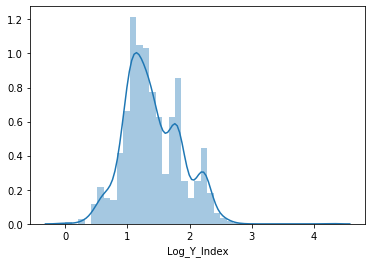

Variable Name: Orientation_Index


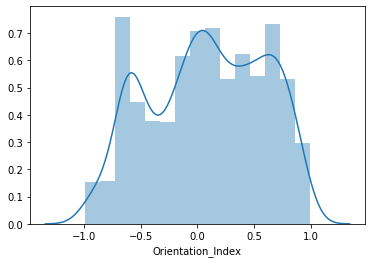

Variable Name: Luminosity_Index


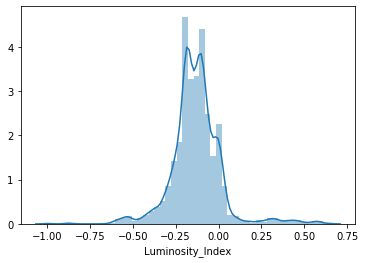

In [291]:
for x in range(0, len(df_steel.columns)-8):
    print("Variable Name:" ,df_steel.columns[x])
    sns.distplot(df_steel.iloc[:,x])
    plt.show()


##### Boxplot for all the independent variables

Variable Name: X_Minimum


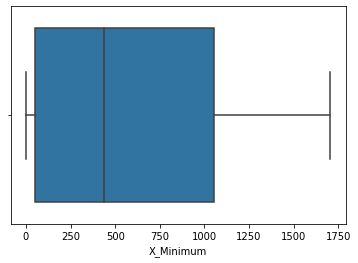

Variable Name: X_Maximum


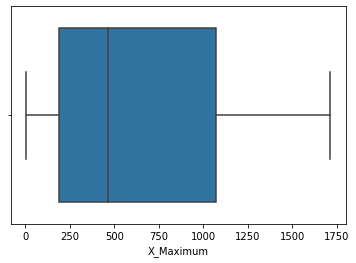

Variable Name: Y_Minimum


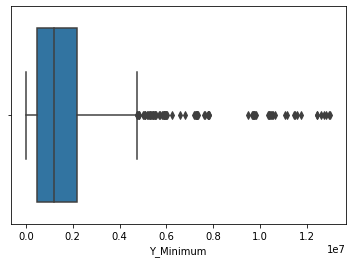

Variable Name: Y_Maximum


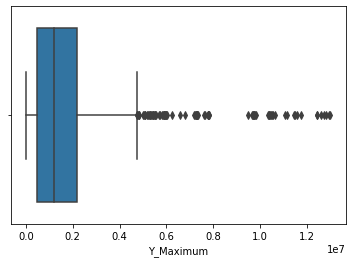

Variable Name: Pixels_Areas


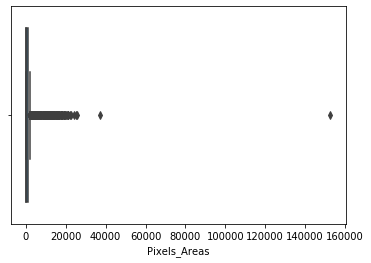

Variable Name: X_Perimeter


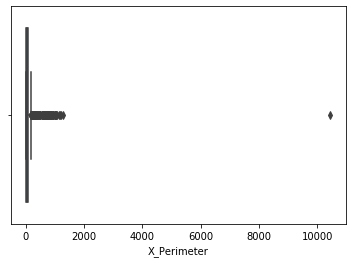

Variable Name: Y_Perimeter


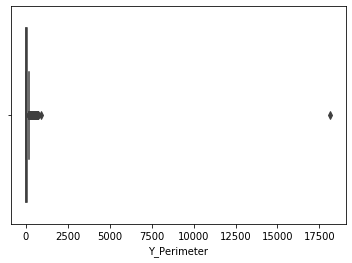

Variable Name: Sum_of_Luminosity


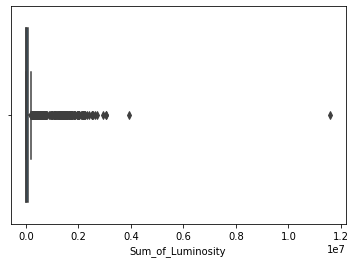

Variable Name: Minimum_of_Luminosity


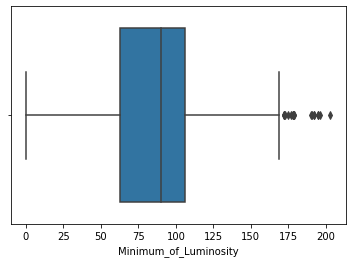

Variable Name: Maximum_of_Luminosity


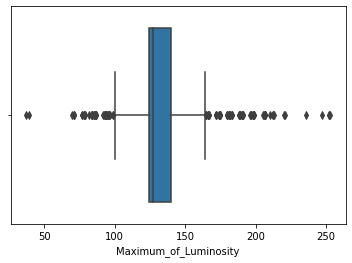

Variable Name: Length_of_Conveyer


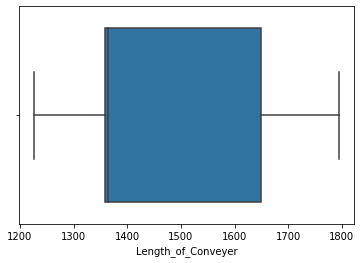

Variable Name: TypeOfSteel_A300


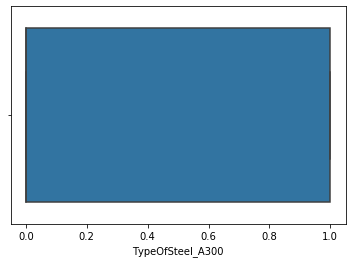

Variable Name: TypeOfSteel_A400


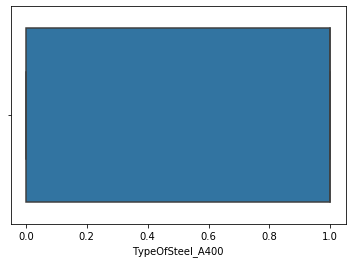

Variable Name: Steel_Plate_Thickness


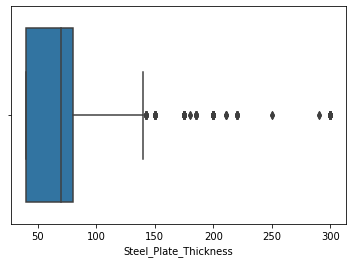

Variable Name: Edges_Index


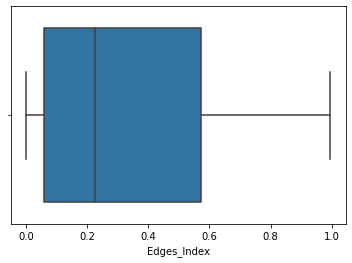

Variable Name: Empty_Index


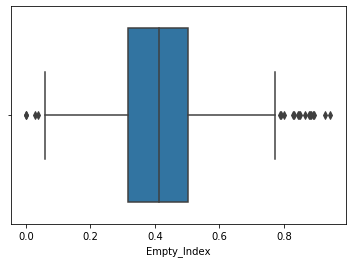

Variable Name: Square_Index


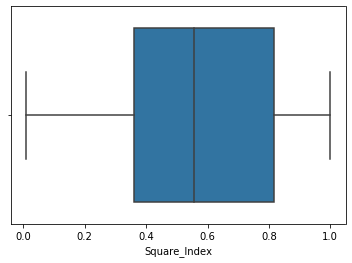

Variable Name: Outside_X_Index


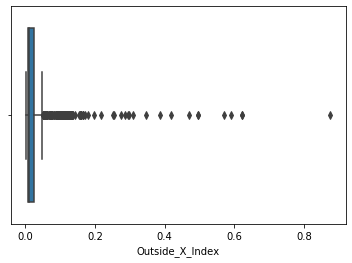

Variable Name: Edges_X_Index


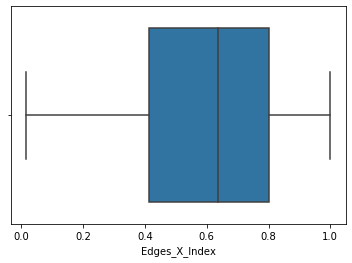

Variable Name: Edges_Y_Index


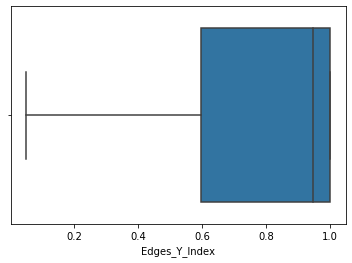

Variable Name: Outside_Global_Index


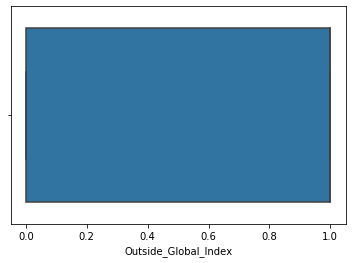

Variable Name: LogOfAreas


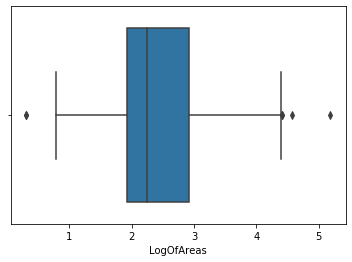

Variable Name: Log_X_Index


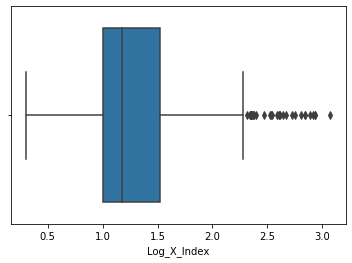

Variable Name: Log_Y_Index


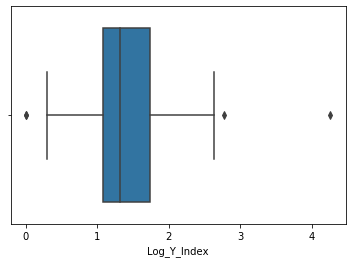

Variable Name: Orientation_Index


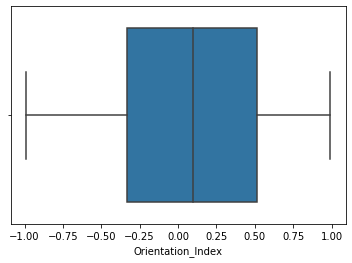

Variable Name: Luminosity_Index


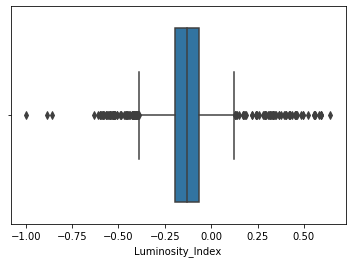

In [292]:
for x in range(0, len(df_steel.columns)-8):
    print("Variable Name:" ,df_steel.columns[x])
    sns.boxplot(df_steel.iloc[:,x])
    plt.show()


##### Log transforming the Pixel Areas variable

###### Observing a normal distribution after transforming the variables

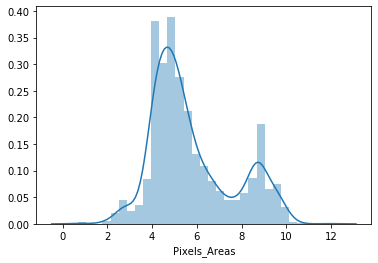

In [293]:
sns.distplot(np.log(df_steel.Pixels_Areas))

###### Observing a normal distribution after transforming the variables

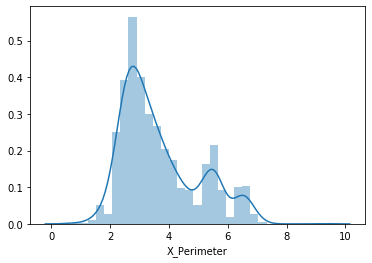

In [294]:
sns.distplot(np.log(df_steel.X_Perimeter))

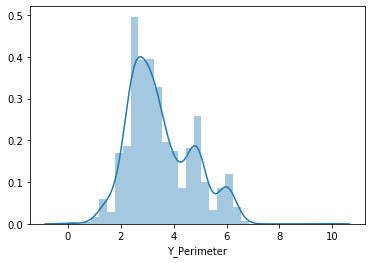

In [295]:
sns.distplot(np.log(df_steel.Y_Perimeter))

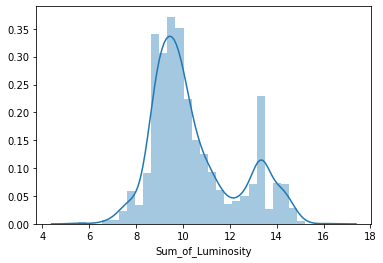

In [296]:
sns.distplot(np.log(df_steel.Sum_of_Luminosity))

##### Target variable - Defects distribution

In [297]:
df_steel[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum()

Pastry          158
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64

In [298]:
target_index = df_steel[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum().index
target_values = df_steel[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum().values

###### distribution of the target variable

<BarContainer object of 7 artists>

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

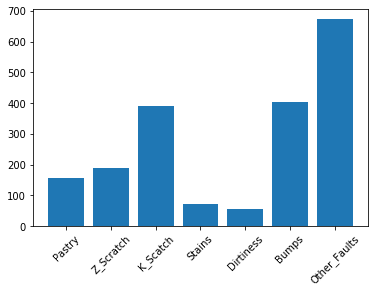

In [299]:
#distribution of the target variable
plt.bar(x=target_index, height= target_values)
plt.xticks(rotation=45)

##### Clubbing the dummy coded target variable in 7 columns to one column

In [300]:
df_steel['Class']=0

In [301]:
df_steel['DefType']=''

In [302]:
#data Consolidation - Consolidating the target dummy variables into single variable
df_steel.loc[df_steel.Pastry==1,'Class'] = 1
df_steel.loc[df_steel.Z_Scratch==1,'Class'] = 2
df_steel.loc[df_steel.K_Scatch==1,'Class'] = 3
df_steel.loc[df_steel.Stains==1,'Class'] = 4
df_steel.loc[df_steel.Dirtiness==1,'Class'] = 5
df_steel.loc[df_steel.Bumps==1,'Class'] = 6
df_steel.loc[df_steel.Other_Faults==1,'Class'] = 7

In [303]:
#data Consolidation - Consolidating the target dummy variables into single variable
df_steel.loc[df_steel.Pastry==1,'DefType'] = 'Pastry'
df_steel.loc[df_steel.Z_Scratch==1,'DefType'] = 'Z_Scratch'
df_steel.loc[df_steel.K_Scatch==1,'DefType'] = 'K_Scatch'
df_steel.loc[df_steel.Stains==1,'DefType'] = 'Stains'
df_steel.loc[df_steel.Dirtiness==1,'DefType'] = 'Dirtiness'
df_steel.loc[df_steel.Bumps==1,'DefType'] = 'Bumps'
df_steel.loc[df_steel.Other_Faults==1,'DefType'] = 'Other_Faults'

In [304]:
df_steel.Class.value_counts()

7    673
6    402
3    391
2    190
1    158
4     72
5     55
Name: Class, dtype: int64

In [305]:
df_steel[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']].sum()

Pastry          158
Z_Scratch       190
K_Scatch        391
Stains           72
Dirtiness        55
Bumps           402
Other_Faults    673
dtype: int64

In [306]:
df_steel[['Class','DefType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 2 columns):
Class      1941 non-null int64
DefType    1941 non-null object
dtypes: int64(1), object(1)
memory usage: 30.5+ KB


In [307]:
df_steel['Class'] = df_steel['Class'].astype('int64')

In [308]:
df_steel[['Class','DefType']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 2 columns):
Class      1941 non-null int64
DefType    1941 non-null object
dtypes: int64(1), object(1)
memory usage: 30.5+ KB


###### Removing the dummy coded target variables

In [309]:
df =df_steel.loc[:, ~df_steel.columns.isin(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'])].copy()

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 29 columns):
X_Minimum                1941 non-null int64
X_Maximum                1941 non-null int64
Y_Minimum                1941 non-null int64
Y_Maximum                1941 non-null int64
Pixels_Areas             1941 non-null int64
X_Perimeter              1941 non-null int64
Y_Perimeter              1941 non-null int64
Sum_of_Luminosity        1941 non-null int64
Minimum_of_Luminosity    1941 non-null int64
Maximum_of_Luminosity    1941 non-null int64
Length_of_Conveyer       1941 non-null int64
TypeOfSteel_A300         1941 non-null int64
TypeOfSteel_A400         1941 non-null int64
Steel_Plate_Thickness    1941 non-null int64
Edges_Index              1941 non-null float64
Empty_Index              1941 non-null float64
Square_Index             1941 non-null float64
Outside_X_Index          1941 non-null float64
Edges_X_Index            1941 non-null float64
Edges_Y_Index            194

In [311]:
df.DefType.value_counts()

Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: DefType, dtype: int64

In [312]:
df.Class.value_counts()

7    673
6    402
3    391
2    190
1    158
4     72
5     55
Name: Class, dtype: int64

In [313]:
#df.to_csv("Faulty_Steel_Plates.CSV",index=False)

In [314]:
df.describe().T

count          mean           std        min          25%           50%           75%           max
X_Minimum              1941.0  5.711360e+02  5.206907e+02     0.0000      51.0000  4.350000e+02  1.053000e+03  1.705000e+03
X_Maximum              1941.0  6.179645e+02  4.976274e+02     4.0000     192.0000  4.670000e+02  1.072000e+03  1.713000e+03
Y_Minimum              1941.0  1.650685e+06  1.774578e+06  6712.0000  471253.0000  1.204128e+06  2.183073e+06  1.298766e+07
Y_Maximum              1941.0  1.650739e+06  1.774590e+06  6724.0000  471281.0000  1.204136e+06  2.183084e+06  1.298769e+07
Pixels_Areas           1941.0  1.893878e+03  5.168460e+03     2.0000      84.0000  1.740000e+02  8.220000e+02  1.526550e+05
X_Perimeter            1941.0  1.118552e+02  3.012092e+02     2.0000      15.0000  2.600000e+01  8.400000e+01  1.044900e+04
Y_Perimeter            1941.0  8.296600e+01  4.264829e+02     1.0000      13.0000  2.500000e+01  8.300000e+01  1.815200e+04
Sum_of_Luminosity      1941.0  2.063121e+05  5.122936e+05   250.0000    9522.0000  1.920200e+04  8.301100e+04  1.159141e+07
Minimum_of_Luminosity  1941.0  8.454869e+01  3.213428e+01     0.0000      63.0000  9.000000e+01  1.060000e+02  2.030000e+02
Maximum_of_Luminosity  1941.0  1.301937e+02  1.869099e+01    37.0000     124.0000  1.270000e+02  1.400000e+02  2.530000e+02
Length_of_Conveyer     1941.0  1.459160e+03  1.445778e+02  1227.0000    1358.0000  1.364000e+03  1.650000e+03  1.794000e+03
TypeOfSteel_A300       1941.0  4.003091e-01  4.900872e-01     0.0000       0.0000  0.000000e+00  1.000000e+00  1.000000e+00
TypeOfSteel_A400       1941.0  5.996909e-01  4.900872e-01     0.0000       0.0000  1.000000e+00  1.000000e+00  1.000000e+00
Steel_Plate_Thickness  1941.0  7.873776e+01  5.508603e+01    40.0000      40.0000  7.000000e+01  8.000000e+01  3.000000e+02
Edges_Index            1941.0  3.317152e-01  2.997117e-01     0.0000       0.0604  2.273000e-01  5.738000e-01  9.952000e-01
Empty_Index            1941.0  4.142033e-01  1.372615e-01     0.0000       0.3158  4.121000e-01  5.016000e-01  9.439000e-01
Square_Index           1941.0  5.707671e-01  2.710584e-01     0.0083       0.3613  5.556000e-01  8.182000e-01  1.000000e+00
Outside_X_Index        1941.0  3.336110e-02  5.896117e-02     0.0015       0.0066  1.010000e-02  2.350000e-02  8.759000e-01
Edges_X_Index          1941.0  6.105286e-01  2.432769e-01     0.0144       0.4118  6.364000e-01  8.000000e-01  1.000000e+00
Edges_Y_Index          1941.0  8.134722e-01  2.342736e-01     0.0484       0.5968  9.474000e-01  1.000000e+00  1.000000e+00
Outside_Global_Index   1941.0  5.757342e-01  4.823520e-01     0.0000       0.0000  1.000000e+00  1.000000e+00  1.000000e+00
LogOfAreas             1941.0  2.492388e+00  7.889299e-01     0.3010       1.9243  2.240600e+00  2.914900e+00  5.183700e+00
Log_X_Index            1941.0  1.335686e+00  4.816116e-01     0.3010       1.0000  1.176100e+00  1.518500e+00  3.074100e+00
Log_Y_Index            1941.0  1.403271e+00  4.543452e-01     0.0000       1.0792  1.322200e+00  1.732400e+00  4.258700e+00
Orientation_Index      1941.0  8.328764e-02  5.008680e-01    -0.9910      -0.3333  9.520000e-02  5.116000e-01  9.917000e-01
Luminosity_Index       1941.0 -1.313050e-01  1.487668e-01    -0.9989      -0.1950 -1.330000e-01 -6.660000e-02  6.421000e-01
SigmoidOfAreas         1941.0  5.854205e-01  3.394518e-01     0.1190       0.2482  5.063000e-01  9.998000e-01  1.000000e+00
Class                  1941.0  4.841319e+00  2.144175e+00     1.0000       3.0000  6.000000e+00  7.000000e+00  7.000000e+00

#### Corelation

In [315]:
df.corr()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas     Class
X_Minimum               1.000000   0.988314   0.041821   0.041807     -0.307322    -0.258937    -0.118757          -0.339045               0.237637              -0.075554            0.316662          0.144319         -0.144319               0.136625     0.278075    -0.198461      0.063658        -0.361160       0.154778       0.367907              0.147282   -0.428553    -0.437944    -0.326851           0.178585         -0.031578       -0.355251  0.291760
X_Maximum               0.988314   1.000000   0.052147   0.052135     -0.225399    -0.186326    -0.090138          -0.247052               0.168649              -0.062392            0.299390          0.112009         -0.112009               0.106119     0.242846    -0.152680      0.048575        -0.214930       0.149259       0.271915              0.099253   -0.332169    -0.324012    -0.265990           0.115019         -0.038996       -0.286736  0.269444
Y_Minimum               0.041821   0.052147   1.000000   1.000000      0.017670     0.023843     0.024150           0.007362              -0.065703              -0.067785           -0.049211          0.075164         -0.075164              -0.207640     0.021314    -0.043117     -0.006135         0.054165       0.066085      -0.036543             -0.062911    0.044952     0.070406    -0.008442          -0.086497         -0.090654        0.025257  0.000106
Y_Maximum               0.041807   0.052135   1.000000   1.000000      0.017840     0.024038     0.024380           0.007499              -0.065733              -0.067776           -0.049219          0.075151         -0.075151              -0.207644     0.021300    -0.043085     -0.006152         0.054185       0.066051      -0.036549             -0.062901    0.044994     0.070432    -0.008382          -0.086480         -0.090666        0.025284  0.000093
Pixels_Areas           -0.307322  -0.225399   0.017670   0.017840      1.000000     0.966644     0.827199           0.978952              -0.497204               0.110063           -0.155853         -0.235591          0.235591              -0.183735    -0.275289     0.272808      0.017865         0.588606      -0.294673      -0.463571             -0.109655    0.650234     0.603072     0.578342          -0.137604         -0.043449        0.422947 -0.239093
X_Perimeter            -0.258937  -0.186326   0.023843   0.024038      0.966644     1.000000     0.912436           0.912956              -0.400427               0.111363           -0.134240         -0.189250          0.189250              -0.147712    -0.227590     0.306348      0.004507         0.517098      -0.293039      -0.412100             -0.079106    0.563036     0.524716     0.523472          -0.101731         -0.032617        0.380605 -0.190590
Y_Perimeter            -0.118757  -0.090138   0.024150   0.024380      0.827199     0.912436     1.000000           0.704876              -0.213758               0.061809           -0.063825         -0.095154          0.095154              -0.058889    -0.111240     0.188825     -0.047511         0.209160      -0.195162      -0.136723              0.013438    0.294040     0.228485     0.344378           0.031381         -0.047778        0.191772 -0.096233
Sum_of_Luminosity      -0.339045  -0.247052   0.007362   0.007499      0.978952     0.912956     0.704876           1.000000              -0.540566               0.136515           -0.169331         -0.263632          0.263632              -0.204812    -0.301452     0.293691      0.049607         0.658339      -0.327728      -0.529745       

#### Corelation Plot

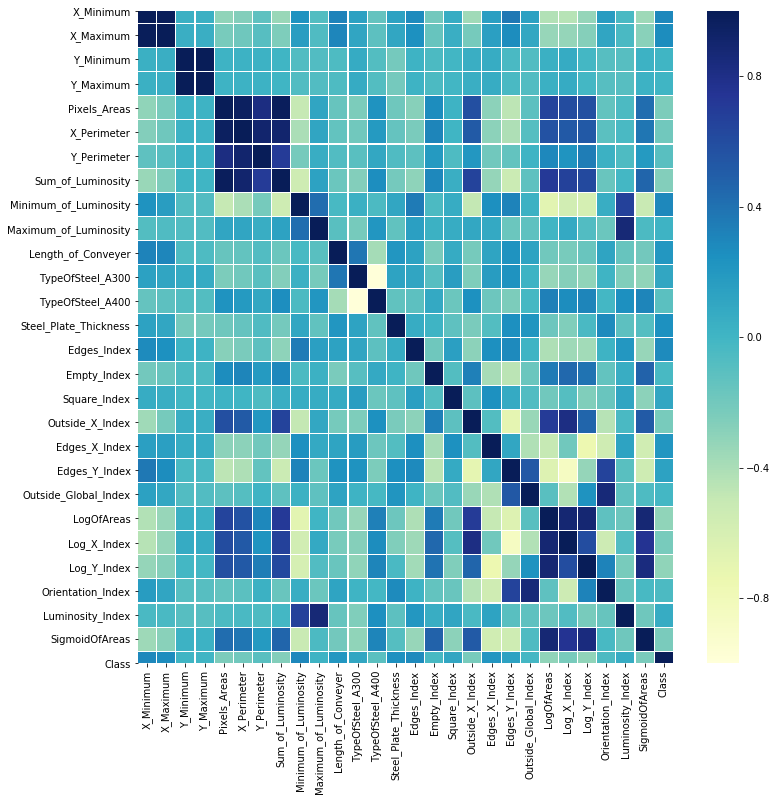

In [316]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths =0.1)

### Predictive Modelling with all Unchanged independent variables

#### Splitting the data into training and testing

In [317]:
#shuffling the data
#df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)

(1941, 29)


In [318]:
X_parts = df.loc[ :, ~df.columns.isin(['Class','DefType'])]
X_parts.head()
print(X_parts.shape)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas
0         42         50     270900     270944           267           17           44              24220                     76                    108                1687                 1                 0                     80       0.0498       0.2415        0.1818           0.0047         0.4706         1.0000                   1.0      2.4265       0.9031       1.6435             0.8182           -0.2913          0.5822
1        645        651    2538079    2538108           108           10           30              11397                     84                    123                1687                 1                 0                     80       0.7647       0.3793        0.2069           0.0036         0.6000         0.9667                   1.0      2.0334       0.7782       1.4624             0.7931           -0.1756          0.2984
2        829        835    1553913    1553931            71            8           19               7972                     99                    125                1623                 1                 0                    100       0.9710       0.3426        0.3333           0.0037         0.7500         0.9474                   1.0      1.8513       0.7782       1.2553             0.6667           -0.1228          0.2150
3        853        860     369370     369415           176           13           45              18996                     99                    126                1353                 0                 1                    290       0.7287       0.4413        0.1556           0.0052         0.5385         1.0000                   1.0      2.2455       0.8451       1.6532             0.8444           -0.1568          0.5212
4       1289       1306     498078     498335          2409           60          260             246930                     37                    126                1353                 0                 1                    185       0.0695       0.4486        0.0662           0.0126         0.2833         0.9885                   1.0      3.3818       1.2305       2.4099             0.9338           -0.1992          1.0000

(1941, 27)


In [319]:
Y_cat = df.loc[:, 'DefType']
print(len(Y_cat.unique()))
Y_cat.head()

7


0    Pastry
1    Pastry
2    Pastry
3    Pastry
4    Pastry
Name: DefType, dtype: object

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X_parts, Y_cat, test_size=0.3, random_state=12342)

In [321]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1358, 27)
(583, 27)
(1358,)
(583,)


In [322]:
X_train.describe().T

count          mean           std        min            25%           50%           75%           max
X_Minimum              1358.0  5.726635e+02  5.244790e+02     0.0000      48.000000  4.190000e+02  1.057750e+03  1.688000e+03
X_Maximum              1358.0  6.183660e+02  5.016641e+02     4.0000     191.250000  4.595000e+02  1.075750e+03  1.712000e+03
Y_Minimum              1358.0  1.678222e+06  1.736243e+06  6712.0000  492998.250000  1.229400e+06  2.228391e+06  1.291703e+07
Y_Maximum              1358.0  1.678265e+06  1.736242e+06  6724.0000  493105.750000  1.229474e+06  2.228512e+06  1.291709e+07
Pixels_Areas           1358.0  1.781730e+03  3.851907e+03     2.0000      82.000000  1.670000e+02  7.877500e+02  3.733400e+04
X_Perimeter            1358.0  1.036701e+02  1.836486e+02     2.0000      14.000000  2.500000e+01  8.175000e+01  1.193000e+03
Y_Perimeter            1358.0  7.181885e+01  1.142033e+02     1.0000      13.000000  2.400000e+01  7.950000e+01  9.030000e+02
Sum_of_Luminosity      1358.0  1.963177e+05  4.395054e+05   250.0000    9210.250000  1.851550e+04  7.780275e+04  3.918209e+06
Minimum_of_Luminosity  1358.0  8.456554e+01  3.216052e+01     0.0000      63.000000  9.000000e+01  1.067500e+02  2.030000e+02
Maximum_of_Luminosity  1358.0  1.299514e+02  1.837353e+01    37.0000     124.000000  1.270000e+02  1.400000e+02  2.520000e+02
Length_of_Conveyer     1358.0  1.459236e+03  1.446490e+02  1227.0000    1358.000000  1.364000e+03  1.650000e+03  1.794000e+03
TypeOfSteel_A300       1358.0  4.057437e-01  4.912163e-01     0.0000       0.000000  0.000000e+00  1.000000e+00  1.000000e+00
TypeOfSteel_A400       1358.0  5.942563e-01  4.912163e-01     0.0000       0.000000  1.000000e+00  1.000000e+00  1.000000e+00
Steel_Plate_Thickness  1358.0  7.848012e+01  5.430125e+01    40.0000      40.000000  7.000000e+01  8.000000e+01  3.000000e+02
Edges_Index            1358.0  3.287971e-01  3.003263e-01     0.0000       0.060400  2.216500e-01  5.635250e-01  9.923000e-01
Empty_Index            1358.0  4.131761e-01  1.333801e-01     0.0000       0.321400  4.092500e-01  4.959750e-01  8.856000e-01
Square_Index           1358.0  5.703882e-01  2.707642e-01     0.0090       0.360875  5.556000e-01  8.213000e-01  1.000000e+00
Outside_X_Index        1358.0  3.256870e-02  5.522742e-02     0.0015       0.006600  9.600000e-03  2.250000e-02  6.226000e-01
Edges_X_Index          1358.0  6.157730e-01  2.418829e-01     0.0657       0.428600  6.429000e-01  8.000000e-01  1.000000e+00
Edges_Y_Index          1358.0  8.142315e-01  2.341229e-01     0.0484       0.597175  9.491500e-01  1.000000e+00  1.000000e+00
Outside_Global_Index   1358.0  5.636966e-01  4.842701e-01     0.0000       0.000000  1.000000e+00  1.000000e+00  1.000000e+00
LogOfAreas             1358.0  2.476850e+00  7.853281e-01     0.3010       1.913800  2.222700e+00  2.896375e+00  4.572100e+00
Log_X_Index            1358.0  1.328766e+00  4.798089e-01     0.3010       1.000000  1.146100e+00  1.505100e+00  2.933500e+00
Log_Y_Index            1358.0  1.392601e+00  4.474672e-01     0.0000       1.079200  1.322200e+00  1.724300e+00  2.629400e+00
Orientation_Index      1358.0  7.896510e-02  5.017729e-01    -0.9910      -0.333300  9.090000e-02  5.000000e-01  9.607000e-01
Luminosity_Index       1358.0 -1.324339e-01  1.512378e-01    -0.9989      -0.193225 -1.328000e-01 -6.680000e-02  6.421000e-01
SigmoidOfAreas         1358.0  5.760945e-01  3.389218e-01     0.1190       0.243200  4.763000e-01  9.998000e-01  1.000000e+00

In [323]:
X_test.describe().T

count          mean           std        min           25%           50%           75%           max
X_Minimum              583.0  5.675780e+02  5.121860e+02     0.0000      67.50000  4.570000e+02  1.046500e+03  1.705000e+03
X_Maximum              583.0  6.170292e+02  4.885201e+02     8.0000     194.50000  4.930000e+02  1.067500e+03  1.713000e+03
Y_Minimum              583.0  1.586543e+06  1.860767e+06  7003.0000  410706.00000  1.105359e+06  2.065044e+06  1.298766e+07
Y_Maximum              583.0  1.586621e+06  1.860808e+06  7020.0000  410830.00000  1.105387e+06  2.065121e+06  1.298769e+07
Pixels_Areas           583.0  2.155108e+03  7.372309e+03     6.0000      90.50000  1.940000e+02  9.420000e+02  1.526550e+05
X_Perimeter            583.0  1.309211e+02  4.725091e+02     4.0000      16.00000  2.900000e+01  9.750000e+01  1.044900e+04
Y_Perimeter            583.0  1.089314e+02  7.582328e+02     2.0000      14.00000  2.600000e+01  8.850000e+01  1.815200e+04
Sum_of_Luminosity      583.0  2.295924e+05  6.508866e+05   775.0000   10691.00000  2.121600e+04  8.930900e+04  1.159141e+07
Minimum_of_Luminosity  583.0  8.450943e+01  3.210062e+01     0.0000      63.50000  8.900000e+01  1.050000e+02  1.950000e+02
Maximum_of_Luminosity  583.0  1.307581e+02  1.941476e+01    84.0000     124.00000  1.270000e+02  1.400000e+02  2.530000e+02
Length_of_Conveyer     583.0  1.458985e+03  1.445360e+02  1227.0000    1358.00000  1.364000e+03  1.652000e+03  1.715000e+03
TypeOfSteel_A300       583.0  3.876501e-01  4.876324e-01     0.0000       0.00000  0.000000e+00  1.000000e+00  1.000000e+00
TypeOfSteel_A400       583.0  6.123499e-01  4.876324e-01     0.0000       0.00000  1.000000e+00  1.000000e+00  1.000000e+00
Steel_Plate_Thickness  583.0  7.933791e+01  5.691509e+01    40.0000      40.00000  7.000000e+01  8.000000e+01  3.000000e+02
Edges_Index            583.0  3.385123e-01  2.984216e-01     0.0000       0.06040  2.408000e-01  6.033000e-01  9.952000e-01
Empty_Index            583.0  4.165962e-01  1.459938e-01     0.0278       0.30270  4.167000e-01  5.113000e-01  9.439000e-01
Square_Index           583.0  5.716497e-01  2.719732e-01     0.0083       0.36335  5.580000e-01  8.182000e-01  1.000000e+00
Outside_X_Index        583.0  3.520686e-02  6.687004e-02     0.0022       0.00660  1.040000e-02  2.430000e-02  8.759000e-01
Edges_X_Index          583.0  5.983127e-01  2.462695e-01     0.0144       0.39340  6.191000e-01  7.930000e-01  1.000000e+00
Edges_Y_Index          583.0  8.117036e-01  2.348160e-01     0.1123       0.59355  9.474000e-01  1.000000e+00  1.000000e+00
Outside_Global_Index   583.0  6.037736e-01  4.770897e-01     0.0000       0.00000  1.000000e+00  1.000000e+00  1.000000e+00
LogOfAreas             583.0  2.528583e+00  7.967589e-01     0.7782       1.95660  2.287800e+00  2.974050e+00  5.183700e+00
Log_X_Index            583.0  1.351806e+00  4.858160e-01     0.4771       1.00000  1.176100e+00  1.556300e+00  3.074100e+00
Log_Y_Index            583.0  1.428127e+00  4.694271e-01     0.3010       1.07920  1.361700e+00  1.770800e+00  4.258700e+00
Orientation_Index      583.0  9.335626e-02  4.990385e-01    -0.9739      -0.29410  1.131000e-01  5.217000e-01  9.917000e-01
Luminosity_Index       583.0 -1.286756e-01  1.429379e-01    -0.5678      -0.19850 -1.339000e-01 -6.590000e-02  5.916000e-01
SigmoidOfAreas         583.0  6.071437e-01  3.399826e-01     0.1262       0.25830  5.461000e-01  9.999000e-01  1.000000e+00

In [324]:
y_train.value_counts()

Other_Faults    462
Bumps           287
K_Scatch        268
Z_Scratch       132
Pastry          120
Stains           49
Dirtiness        40
Name: DefType, dtype: int64

In [325]:
y_test.value_counts()

Other_Faults    211
K_Scatch        123
Bumps           115
Z_Scratch        58
Pastry           38
Stains           23
Dirtiness        15
Name: DefType, dtype: int64

#### Decision Trees

In [326]:
col_names = list(df.loc[ :, ~df.columns.isin(['Class','DefType'])].columns.values)
classnames = list(df.DefType.unique())

In [327]:
##Performing Descision trees using all categories 
tre2 = tree.DecisionTreeClassifier().fit(X_train,y_train)

predicted = tre2.predict(X_test)

print(metrics.classification_report(y_test, predicted))


              precision    recall  f1-score   support

       Bumps       0.63      0.51      0.57       115
   Dirtiness       0.67      0.67      0.67        15
    K_Scatch       0.87      0.90      0.88       123
Other_Faults       0.64      0.62      0.63       211
      Pastry       0.34      0.53      0.41        38
      Stains       0.96      0.96      0.96        23
   Z_Scratch       0.79      0.86      0.83        58

    accuracy                           0.69       583
   macro avg       0.70      0.72      0.71       583
weighted avg       0.70      0.69      0.69       583



###### Confusion Matrix of Predicted vs Actual - Test Data

In [328]:
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[ 59   0   2  39  12   0   3]
 [  1  10   0   3   1   0   0]
 [  0   0 111  11   0   0   1]
 [ 26   5  15 130  25   1   9]
 [  6   0   0  12  20   0   0]
 [  0   0   0   1   0  22   0]
 [  1   0   0   6   1   0  50]]


Text(0.5, 1.05, 'Confusion Matrix')

Text(0.5, 0, 'Actual Value')

Text(0, 0.5, 'Predicted Value')

([<matplotlib.axis.XTick at 0x299bf03d3c8>,
 <a list of 7 Text xticklabel objects>)

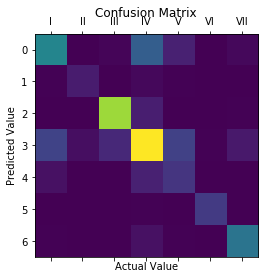

In [329]:
#cm chart
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3,4,5,6], ['I','II','III','IV','V','VI','VII'])

#### Important Features in the decision tree model

In [330]:
eli5.show_weights(tre2,feature_names = list(X_test.columns),top=None) 

##### Interpreting which variables are impacting in predicting an observation

In [331]:
print("Actual defect value is:",y_test.iloc[150])
test_row = pd.DataFrame(X_test.iloc[150,:]).T

Actual defect value is: Other_Faults


##### Contribution of feature in predicting the category

In [332]:
#eli5.show_prediction(tre2, test_row.values[0],feature_names=list(X_test.columns),top=None)
lid = [150]
for i in lid:
    print("Actual test value:",y_test.iloc[i])
    print("------------")
    print("Pedidcted value is ")

eli5.show_prediction(tre2, X_test.iloc[i], feature_names = list(X_train.columns))

Actual test value: Other_Faults
------------
Pedidcted value is 


##### Decision Tree rules

In [333]:
from sklearn.tree import _tree

def tree_to_pseudo(tree, feature_names):

	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print (indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print (indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print (indent,"}")
		else:
			print (indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)
tree_to_pseudo(tre2, list(X_train.columns))

 if ( Log_X_Index <= 2.0588001012802124 ) {
   if ( Pixels_Areas <= 30.0 ) {
     if ( Steel_Plate_Thickness <= 75.0 ) {
       if ( Steel_Plate_Thickness <= 45.0 ) {
         return [[0. 0. 2. 0. 0. 0. 0.]]
       } else {
         return [[ 0.  0.  0.  0.  0. 43.  0.]]
       }
     } else {
       if ( Square_Index <= 0.9000000059604645 ) {
         return [[0. 0. 0. 4. 0. 0. 0.]]
       } else {
         return [[1. 0. 0. 0. 0. 0. 0.]]
       }
     }
   } else {
     if ( Square_Index <= 0.5042499899864197 ) {
       if ( Edges_Y_Index <= 0.9775499999523163 ) {
         if ( Length_of_Conveyer <= 1359.0 ) {
           if ( TypeOfSteel_A400 <= 0.5 ) {
             if ( Y_Minimum <= 2739956.0 ) {
               if ( Length_of_Conveyer <= 1357.0 ) {
                 return [[ 0.  0.  0.  0.  0.  0. 30.]]
               } else {
                 if ( Y_Minimum <= 1885943.0 ) {
                   return [[0. 0. 0. 0. 0. 0. 2.]]
                 } else {
                   return [[0. 0

##### node rules- in text format

In [334]:
dotfile = open(r"C:\Users\Anirud Vem\Desktop\Faulty steel plates\dt_rules.dot", 'w')
tree.export_graphviz(tre2, out_file=dotfile, feature_names=list(X_train.columns))
dotfile.close()

In [335]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus

col_names = list(df.loc[ :, ~df.columns.isin(['Class','DefType'])].columns.values)
classnames = list(df.DefType.unique())

# Create DOT data
dot_data = tree.export_graphviz(tre2, out_file=None, 
                                feature_names=col_names,  
                                class_names=classnames)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

# Create PDF
#graph.write_pdf("faultyplates.pdf")

# Create PNG
graph.write_png("faultyplates.png")

True

#### Building Random Forest Model

In [336]:
##Performing random forest using all categories 
from sklearn.ensemble import RandomForestClassifier
rand1 = RandomForestClassifier().fit(X_train,y_train)

rand1_pred = rand1.predict(X_test)

print(metrics.classification_report(y_test, rand1_pred))

              precision    recall  f1-score   support

       Bumps       0.58      0.65      0.61       115
   Dirtiness       0.81      0.87      0.84        15
    K_Scatch       0.96      0.92      0.94       123
Other_Faults       0.69      0.68      0.68       211
      Pastry       0.50      0.50      0.50        38
      Stains       1.00      0.91      0.95        23
   Z_Scratch       0.92      0.81      0.86        58

    accuracy                           0.74       583
   macro avg       0.78      0.76      0.77       583
weighted avg       0.75      0.74      0.74       583



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


##### Confusion matrix on random forest

In [337]:
cm = metrics.confusion_matrix(y_test, rand1_pred)
print(cm)

[[ 75   0   1  33   6   0   0]
 [  0  13   0   1   1   0   0]
 [  1   0 113   9   0   0   0]
 [ 45   3   3 144  12   0   4]
 [  8   0   0  11  19   0   0]
 [  0   0   0   2   0  21   0]
 [  0   0   1  10   0   0  47]]


Text(0.5, 1.05, 'Confusion Matrix')

Text(0.5, 0, 'Actual Value')

Text(0, 0.5, 'Predicted Value')

([<matplotlib.axis.XTick at 0x299b3b91108>,
 <a list of 7 Text xticklabel objects>)

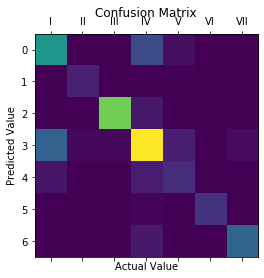

In [338]:
#cm chart
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3,4,5,6], ['I','II','III','IV','V','VI','VII'])

#### Feature Importance

In [339]:
eli5.show_weights(rand1,feature_names=list(X_test.columns),top=None)

### Neural Network

In [340]:
# Standardize the scaling of the variables by
# computing the mean and std to be used for later scaling.
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Perform the standardization process
steel_data_train_std = scaler.transform(X_train)
steel_data_test_std = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [341]:
nnclass2 = MLPClassifier(activation='relu', solver='sgd',
                         hidden_layer_sizes=(50,50,50))
nnclass2.fit(steel_data_train_std, y_train)

nnclass2_pred = nnclass2.predict(steel_data_test_std)

print(metrics.classification_report(y_test, nnclass2_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

              precision    recall  f1-score   support

       Bumps       0.55      0.58      0.57       115
   Dirtiness       1.00      0.20      0.33        15
    K_Scatch       0.95      0.93      0.94       123
Other_Faults       0.66      0.66      0.66       211
      Pastry       0.43      0.53      0.48        38
      Stains       0.90      0.83      0.86        23
   Z_Scratch       0.85      0.88      0.86        58

    accuracy                           0.71       583
   macro avg       0.76      0.66      0.67       583
weighted avg       0.72      0.71      0.71       583



In [342]:
cm = metrics.confusion_matrix(y_test, nnclass2_pred)
print(cm)

[[ 67   0   1  40   4   0   3]
 [  1   3   0   5   6   0   0]
 [  0   0 114   9   0   0   0]
 [ 44   0   5 140  16   2   4]
 [  6   0   0  10  20   0   2]
 [  1   0   0   3   0  19   0]
 [  2   0   0   5   0   0  51]]


Text(0.5, 1.05, 'Confusion Matrix')

Text(0.5, 0, 'Actual Value')

Text(0, 0.5, 'Predicted Value')

([<matplotlib.axis.XTick at 0x299c295cac8>,
 <a list of 7 Text xticklabel objects>)

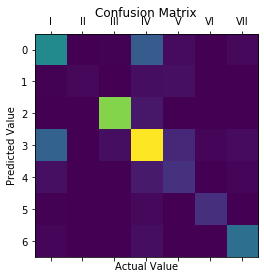

In [343]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3,4,5,6], ['I','II','III','IV','V','VI','VII'])

##### Auto Neural Network

In [344]:
nnclass3 = MLPClassifier(activation='relu', solver='sgd')
nnclass3.fit(steel_data_train_std, y_train)

nnclass3_pred = nnclass3.predict(steel_data_test_std)

print(metrics.classification_report(y_test, nnclass3_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

              precision    recall  f1-score   support

       Bumps       0.54      0.60      0.57       115
   Dirtiness       0.91      0.67      0.77        15
    K_Scatch       0.97      0.92      0.94       123
Other_Faults       0.68      0.65      0.67       211
      Pastry       0.41      0.50      0.45        38
      Stains       0.95      0.91      0.93        23
   Z_Scratch       0.86      0.83      0.84        58

    accuracy                           0.72       583
   macro avg       0.76      0.73      0.74       583
weighted avg       0.73      0.72      0.72       583



In [345]:
nnclass3.hidden_layer_sizes

(100,)

In [346]:
cm = metrics.confusion_matrix(y_test, nnclass2_pred)
print(cm)

[[ 67   0   1  40   4   0   3]
 [  1   3   0   5   6   0   0]
 [  0   0 114   9   0   0   0]
 [ 44   0   5 140  16   2   4]
 [  6   0   0  10  20   0   2]
 [  1   0   0   3   0  19   0]
 [  2   0   0   5   0   0  51]]


### Modifying the independent variables

#### Normalizing the data

In [347]:
##Normalizing the data - range transformation
reduc_data = df.loc[:, ~df.columns.isin(['Class','DefType'])]
col_names = reduc_data.columns
reduc_data_values = reduc_data.values
scaler = preprocessing.MinMaxScaler()
reduc_data_scaled = scaler.fit_transform(reduc_data_values)
reduc_norm = pd.DataFrame(reduc_data_scaled,columns = col_names)
reduc_norm

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas
0      0.024633   0.026916   0.020352   0.020354      0.001736     0.001436     0.002369           0.002068               0.374384               0.328704            0.811287               1.0               0.0               0.153846     0.050040     0.255853      0.174952         0.003660       0.462865       1.000000                   1.0    0.435312     0.217122     0.385916           0.912493          0.431200        0.525766
1      0.378299   0.378584   0.195006   0.195007      0.000694     0.000766     0.001598           0.000962               0.413793               0.398148            0.811287               1.0               0.0               0.153846     0.768388     0.401843      0.200262         0.002402       0.594156       0.965006                   1.0    0.354804     0.172082     0.343391           0.899834          0.501706        0.203632
2      0.486217   0.486249   0.119190   0.119190      0.000452     0.000574     0.000992           0.000666               0.487685               0.407407            0.698413               1.0               0.0               0.230769     0.975683     0.362962      0.327720         0.002516       0.746347       0.944725                   1.0    0.317509     0.172082     0.294761           0.836082          0.533882        0.108967
3      0.500293   0.500878   0.027938   0.027940      0.001140     0.001053     0.002424           0.001617               0.487685               0.412037            0.222222               0.0               1.0               0.961538     0.732215     0.467528      0.148533         0.004231       0.531757       1.000000                   1.0    0.398243     0.196206     0.388194           0.925707          0.513163        0.456527
4      0.756012   0.761849   0.037853   0.037872      0.015768     0.005552     0.014269           0.021282               0.182266               0.412037            0.222222               0.0               1.0               0.557692     0.069835     0.475262      0.058385         0.012694       0.272829       0.987915                   1.0    0.630962     0.335184     0.565877           0.970797          0.487325        1.000000
...         ...        ...        ...        ...           ...          ...          ...                ...                    ...                    ...                 ...               ...               ...                    ...          ...          ...           ...              ...            ...            ...                   ...         ...          ...          ...                ...               ...             ...
1936   0.146041   0.159743   0.024580   0.024580      0.001775     0.004978     0.001157           0.003001               0.586207               0.481481            0.234568               0.0               1.0               0.000000     0.367966     0.413815      0.567813         0.021844       0.511465       0.713430                   0.0    0.437299     0.413328     0.282739           0.283654          0.610299        0.688309
1937   0.084457   0.100059   0.025720   0.025720      0.001867     0.004020     0.001267           0.002963               0.551724               0.444444            0.234568               0.0               1.0               0.000000     0.212822     0.482466      0.544620         0.024360       0.700284       0.693464                   0.0    0.441743     0.429267     0.288938           0.272053          0.573248        0.792622
1938   0.085044   0.099473   0.029279   0.029279      0.001900     0.003637     0.001157           0.003220  

##### Checking for corelation among independent variables

In [348]:
reduc_norm.corr()

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  Maximum_of_Luminosity  Length_of_Conveyer  TypeOfSteel_A300  TypeOfSteel_A400  Steel_Plate_Thickness  Edges_Index  Empty_Index  Square_Index  Outside_X_Index  Edges_X_Index  Edges_Y_Index  Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas
X_Minimum               1.000000   0.988314   0.041821   0.041807     -0.307322    -0.258937    -0.118757          -0.339045               0.237637              -0.075554            0.316662          0.144319         -0.144319               0.136625     0.278075    -0.198461      0.063658        -0.361160       0.154778       0.367907              0.147282   -0.428553    -0.437944    -0.326851           0.178585         -0.031578       -0.355251
X_Maximum               0.988314   1.000000   0.052147   0.052135     -0.225399    -0.186326    -0.090138          -0.247052               0.168649              -0.062392            0.299390          0.112009         -0.112009               0.106119     0.242846    -0.152680      0.048575        -0.214930       0.149259       0.271915              0.099253   -0.332169    -0.324012    -0.265990           0.115019         -0.038996       -0.286736
Y_Minimum               0.041821   0.052147   1.000000   1.000000      0.017670     0.023843     0.024150           0.007362              -0.065703              -0.067785           -0.049211          0.075164         -0.075164              -0.207640     0.021314    -0.043117     -0.006135         0.054165       0.066085      -0.036543             -0.062911    0.044952     0.070406    -0.008442          -0.086497         -0.090654        0.025257
Y_Maximum               0.041807   0.052135   1.000000   1.000000      0.017840     0.024038     0.024380           0.007499              -0.065733              -0.067776           -0.049219          0.075151         -0.075151              -0.207644     0.021300    -0.043085     -0.006152         0.054185       0.066051      -0.036549             -0.062901    0.044994     0.070432    -0.008382          -0.086480         -0.090666        0.025284
Pixels_Areas           -0.307322  -0.225399   0.017670   0.017840      1.000000     0.966644     0.827199           0.978952              -0.497204               0.110063           -0.155853         -0.235591          0.235591              -0.183735    -0.275289     0.272808      0.017865         0.588606      -0.294673      -0.463571             -0.109655    0.650234     0.603072     0.578342          -0.137604         -0.043449        0.422947
X_Perimeter            -0.258937  -0.186326   0.023843   0.024038      0.966644     1.000000     0.912436           0.912956              -0.400427               0.111363           -0.134240         -0.189250          0.189250              -0.147712    -0.227590     0.306348      0.004507         0.517098      -0.293039      -0.412100             -0.079106    0.563036     0.524716     0.523472          -0.101731         -0.032617        0.380605
Y_Perimeter            -0.118757  -0.090138   0.024150   0.024380      0.827199     0.912436     1.000000           0.704876              -0.213758               0.061809           -0.063825         -0.095154          0.095154              -0.058889    -0.111240     0.188825     -0.047511         0.209160      -0.195162      -0.136723              0.013438    0.294040     0.228485     0.344378           0.031381         -0.047778        0.191772
Sum_of_Luminosity      -0.339045  -0.247052   0.007362   0.007499      0.978952     0.912956     0.704876           1.000000              -0.540566               0.136515           -0.169331         -0.263632          0.263632              -0.204812    -0.301452     0.293691      0.049607         0.658339      -0.327728      -0.529745             -0.121090    0.712128     0.667736     0.618795          -0.158483        

##### Removing the highly correlated independent variables

In [349]:
reduc_filt = reduc_norm.loc[:, ~reduc_norm.columns.isin(['X_Maximum','Y_Maximum','X_Perimeter','Y_Perimeter','Sum_of_Luminosity','TypeOfSteel_A400','Log_X_Index','Log_Y_Index','Orientation_Index','SigmoidOfAreas'])].copy()
print(reduc_filt.shape)

(1941, 17)


#### Principal Component Analysis - Normalized Data

In [350]:
pca_result = pca(n_components=17).fit(reduc_filt)
#Obtain eigenvalues
pca_result.explained_variance_

array([0.30255364, 0.25737568, 0.14203245, 0.07720271, 0.06535347,
       0.0531238 , 0.04855801, 0.04032302, 0.02686413, 0.022293  ,
       0.01633811, 0.01117909, 0.00714101, 0.00253667, 0.00138878,
       0.00056129, 0.00053266])

<Figure size 504x360 with 0 Axes>

Text(0, 0.5, 'Proportion of Variance Explained')

Text(0.5, 0, 'Principal Component')

([<matplotlib.axis.XTick at 0x299c29ba6c8>,
 <a list of 17 Text xticklabel objects>)

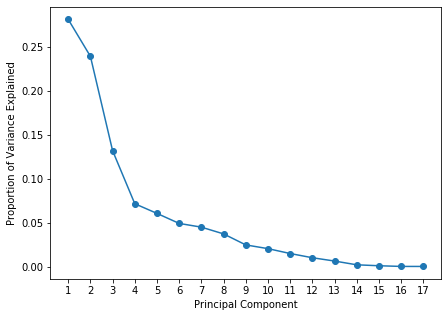

In [351]:
#plotting PCA
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 17], pca_result.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained') 
plt.xlabel('Principal Component') 
#plt.xlim(0.75,4.25) 
#plt.ylim(0,1.05) 
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16, 17])

#### Factor Analysis

In [352]:
fa = FactorAnalyzer(9,rotation='varimax')
fa.fit(reduc_filt)
fa.loadings_

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=9, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

array([[ 0.33844407, -0.04467156,  0.05897517,  0.00892601, -0.04800935,
         0.64851618,  0.02186099, -0.04142992,  0.05163826],
       [-0.01328759, -0.06920228, -0.03499891,  0.04844939, -0.01424139,
         0.04533559, -0.03528067, -0.41879793,  0.03125152],
       [-0.72074514,  0.05670127,  0.0417465 , -0.089478  ,  0.13270463,
        -0.10070663,  0.1011614 , -0.07000087,  0.0541188 ],
       [ 0.74199926,  0.54179381, -0.04402201, -0.01837413,  0.14797361,
         0.03733792, -0.01443793,  0.06520432,  0.06253286],
       [-0.0680706 ,  0.89982635, -0.06134579, -0.06172601, -0.03008206,
        -0.0147013 ,  0.0262933 ,  0.00520856, -0.00274686],
       [ 0.0422524 , -0.07748696,  0.03156894,  0.33985495, -0.23333652,
         0.45154258,  0.03897444,  0.20986452, -0.0821435 ],
       [ 0.20058351, -0.1649933 , -0.02692938,  0.95248404, -0.00339229,
         0.08776957,  0.10045671, -0.04067847,  0.03059028],
       [ 0.15662106, -0.11157481,  0.12417299,  0.10497948,  0

##### Converting the factor analysis results into dataframe

In [353]:
fa_load_df = pd. DataFrame([[ 0.33844407, -0.04467156,  0.05897517,  0.00892601, -0.04800935,
         0.64851618,  0.02186099, -0.04142992,  0.05163826],
       [-0.01328759, -0.06920228, -0.03499891,  0.04844939, -0.01424139,
         0.04533559, -0.03528067, -0.41879793,  0.03125152],
       [-0.72074514,  0.05670127,  0.0417465 , -0.089478  ,  0.13270463,
        -0.10070663,  0.1011614 , -0.07000087,  0.0541188 ],
       [ 0.74199926,  0.54179381, -0.04402201, -0.01837413,  0.14797361,
         0.03733792, -0.01443793,  0.06520432,  0.06253286],
       [-0.0680706 ,  0.89982635, -0.06134579, -0.06172601, -0.03008206,
        -0.0147013 ,  0.0262933 ,  0.00520856, -0.00274686],
       [ 0.0422524 , -0.07748696,  0.03156894,  0.33985495, -0.23333652,
         0.45154258,  0.03897444,  0.20986452, -0.0821435 ],
       [ 0.20058351, -0.1649933 , -0.02692938,  0.95248404, -0.00339229,
         0.08776957,  0.10045671, -0.04067847,  0.03059028],
       [ 0.15662106, -0.11157481,  0.12417299,  0.10497948,  0.04047146,
         0.15178128, -0.14306714,  0.5444327 ,  0.08100534],
       [ 0.35419702,  0.17752288, -0.05143901,  0.03698364, -0.08560933,
         0.24708459,  0.11268649, -0.01915752,  0.07701451],
       [-0.23587972,  0.03629773, -0.02064437, -0.02012922,  0.73473651,
        -0.11963355, -0.03487342,  0.073519  , -0.01082887],
       [ 0.06421641,  0.05923367, -0.07702312,  0.07855792, -0.03956167,
         0.04517189,  0.77518524, -0.03880839,  0.00952248],
       [-0.75356941,  0.04681758, -0.29746262, -0.08637265,  0.19271434,
        -0.13349901, -0.0967648 , -0.11817857,  0.08639293],
       [ 0.30872356,  0.06221269, -0.77756023,  0.07095359, -0.42040798,
         0.090543  ,  0.15960372, -0.05478872,  0.27370287],
       [ 0.58744241, -0.11621573,  0.47466621,  0.08991385, -0.39992519,
         0.1555088 ,  0.07998125,  0.102352  ,  0.38042246],
       [ 0.12740829, -0.07893841,  0.69026662,  0.00282869, -0.15139386,
         0.07819046, -0.04281443,  0.1463228 ,  0.10609889],
       [-0.87309107, -0.05623831,  0.09138196, -0.13068968,  0.16868582,
        -0.17634411, -0.13516937, -0.07281583, -0.14336892],
       [ 0.17279672,  0.96393867, -0.07136082, -0.136412  ,  0.07667582,
        -0.06051132,  0.06990843,  0.01728517, -0.01983381]],columns = ["f1", "f2","f3","f4","f5","f6","f7","f8","f9"],index=reduc_filt.columns)
fa_load_df

f1        f2        f3        f4        f5        f6        f7        f8        f9
X_Minimum              0.338444 -0.044672  0.058975  0.008926 -0.048009  0.648516  0.021861 -0.041430  0.051638
Y_Minimum             -0.013288 -0.069202 -0.034999  0.048449 -0.014241  0.045336 -0.035281 -0.418798  0.031252
Pixels_Areas          -0.720745  0.056701  0.041746 -0.089478  0.132705 -0.100707  0.101161 -0.070001  0.054119
Minimum_of_Luminosity  0.741999  0.541794 -0.044022 -0.018374  0.147974  0.037338 -0.014438  0.065204  0.062533
Maximum_of_Luminosity -0.068071  0.899826 -0.061346 -0.061726 -0.030082 -0.014701  0.026293  0.005209 -0.002747
Length_of_Conveyer     0.042252 -0.077487  0.031569  0.339855 -0.233337  0.451543  0.038974  0.209865 -0.082143
TypeOfSteel_A300       0.200584 -0.164993 -0.026929  0.952484 -0.003392  0.087770  0.100457 -0.040678  0.030590
Steel_Plate_Thickness  0.156621 -0.111575  0.124173  0.104979  0.040471  0.151781 -0.143067  0.544433  0.081005
Edges_Index            0.354197  0.177523 -0.051439  0.036984 -0.085609  0.247085  0.112686 -0.019158  0.077015
Empty_Index           -0.235880  0.036298 -0.020644 -0.020129  0.734737 -0.119634 -0.034873  0.073519 -0.010829
Square_Index           0.064216  0.059234 -0.077023  0.078558 -0.039562  0.045172  0.775185 -0.038808  0.009522
Outside_X_Index       -0.753569  0.046818 -0.297463 -0.086373  0.192714 -0.133499 -0.096765 -0.118179  0.086393
Edges_X_Index          0.308724  0.062213 -0.777560  0.070954 -0.420408  0.090543  0.159604 -0.054789  0.273703
Edges_Y_Index          0.587442 -0.116216  0.474666  0.089914 -0.399925  0.155509  0.079981  0.102352  0.380422
Outside_Global_Index   0.127408 -0.078938  0.690267  0.002829 -0.151394  0.078190 -0.042814  0.146323  0.106099
LogOfAreas            -0.873091 -0.056238  0.091382 -0.130690  0.168686 -0.176344 -0.135169 -0.072816 -0.143369
Luminosity_Index       0.172797  0.963939 -0.071361 -0.136412  0.076676 -0.060511  0.069908  0.017285 -0.019834

In [354]:
#selecting the highest variance shared variable from each factor
'LogOfAreas','Luminosity_Index','Edges_X_Index','TypeOfSteel_A300','Empty_Index','X_Minimum','Square_Index','Steel_Plate_Thickness','Edges_Y_Index'

('LogOfAreas',
 'Luminosity_Index',
 'Edges_X_Index',
 'TypeOfSteel_A300',
 'Empty_Index',
 'X_Minimum',
 'Square_Index',
 'Steel_Plate_Thickness',
 'Edges_Y_Index')

### Variable Clustering Algorithm to Cluster the Independent variables

In [355]:
demo1_vc = VarClusHi(reduc_filt,maxeigval2=1,maxclus=9)
demo1_vc.varclus()
demo1_vc.info

Cluster N_Vars   Eigval1   Eigval2   VarProp
0       0      7  3.563414  0.888506  0.509059
1       1      4  2.341821  0.987472  0.585455
2       2      4  1.611411  0.944601  0.402853
3       3      2  1.378542  0.621458  0.689271

##### Variable clustering algorithm suggested 4 clusters

In [356]:
demo1_vc.rsquare

Cluster               Variable    RS_Own     RS_NC  RS_Ratio
0        0              X_Minimum  0.322580  0.077076  0.733993
1        0           Pixels_Areas  0.552038  0.055576  0.474323
2        0            Edges_Index  0.257274  0.067423  0.796423
3        0            Empty_Index  0.288507  0.037736  0.739395
4        0        Outside_X_Index  0.709134  0.077478  0.315294
5        0          Edges_Y_Index  0.664701  0.082306  0.365371
6        0             LogOfAreas  0.769180  0.099157  0.256227
7        1              Y_Minimum  0.021915  0.014246  0.992220
8        1  Minimum_of_Luminosity  0.598967  0.306919  0.578623
9        1  Maximum_of_Luminosity  0.781264  0.035840  0.226867
10       1       Luminosity_Index  0.939675  0.058785  0.064092
11       2  Steel_Plate_Thickness  0.219306  0.049426  0.821287
12       2          Edges_X_Index  0.590130  0.119298  0.465389
13       2           Square_Index  0.236481  0.020519  0.779514
14       2   Outside_Global_Index  0.565493  0.089500  0.477218
15       3     Length_of_Conveyer  0.689271  0.084008  0.339226
16       3       TypeOfSteel_A300  0.689271  0.087599  0.340561

## Predictive Modelling - Variables suggested by factor analysis

In [357]:
#variables are 
#'LogOfAreas','Luminosity_Index','Edges_X_Index','TypeOfSteel_A300','Empty_Index','X_Minimum','Square_Index','Steel_Plate_Thickness','Edges_Y_Index'

In [358]:
reduc_factor = reduc_filt.loc[:, reduc_filt.columns.isin(['LogOfAreas','Luminosity_Index','Edges_X_Index','TypeOfSteel_A300','Empty_Index','X_Minimum','Square_Index','Steel_Plate_Thickness','Edges_Y_Index'])].copy()

#### Splitting the data into training and testing

In [359]:
Y_cat = df.loc[:, 'DefType']
print(len(Y_cat.unique()))
Y_cat.head()

7


0    Pastry
1    Pastry
2    Pastry
3    Pastry
4    Pastry
Name: DefType, dtype: object

In [360]:
X_train, X_test, y_train, y_test = train_test_split(reduc_factor, Y_cat, test_size=0.3, random_state=42)

In [361]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1358, 9)
(583, 9)
(1358,)
(583,)


#### Decision Trees

In [362]:
col_names = list(reduc_factor.columns.values)
classnames = list(df.DefType.unique())
col_names

['X_Minimum',
 'TypeOfSteel_A300',
 'Steel_Plate_Thickness',
 'Empty_Index',
 'Square_Index',
 'Edges_X_Index',
 'Edges_Y_Index',
 'LogOfAreas',
 'Luminosity_Index']

In [363]:
##Performing Descision trees using all categories 
tre2 = tree.DecisionTreeClassifier().fit(X_train,y_train)

predicted = tre2.predict(X_test)

print(metrics.classification_report(y_test, predicted))


              precision    recall  f1-score   support

       Bumps       0.49      0.56      0.53       110
   Dirtiness       0.60      0.60      0.60        15
    K_Scatch       0.96      0.88      0.92       120
Other_Faults       0.64      0.64      0.64       215
      Pastry       0.41      0.41      0.41        37
      Stains       0.91      0.91      0.91        23
   Z_Scratch       0.78      0.75      0.76        63

    accuracy                           0.68       583
   macro avg       0.69      0.68      0.68       583
weighted avg       0.69      0.68      0.68       583



In [364]:
##Performing Descision trees using all categories 
cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

[[ 62   0   0  39   7   0   2]
 [  0   9   0   5   1   0   0]
 [  2   0 105  13   0   0   0]
 [ 46   3   3 137  13   2  11]
 [ 12   2   0   8  15   0   0]
 [  1   0   0   1   0  21   0]
 [  3   1   1  10   1   0  47]]


Text(0.5, 1.05, 'Confusion Matrix')

Text(0.5, 0, 'Actual Value')

Text(0, 0.5, 'Predicted Value')

([<matplotlib.axis.XTick at 0x299c29d3a08>,
 <a list of 7 Text xticklabel objects>)

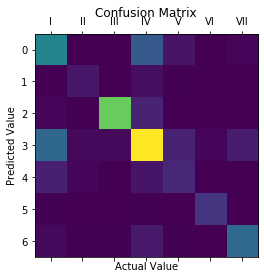

In [365]:
#cm chart
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3,4,5,6], ['I','II','III','IV','V','VI','VII'])

#### Important Features in the decision tree model

In [366]:
eli5.show_weights(tre2,feature_names = list(X_test.columns),top=None) 

In [367]:
print("Actual defect value is:",y_test.iloc[101])
test_row = pd.DataFrame(X_test.iloc[101,:]).T
test_row

Actual defect value is: Other_Faults


X_Minimum  TypeOfSteel_A300  Steel_Plate_Thickness  Empty_Index  Square_Index  Edges_X_Index  Edges_Y_Index  LogOfAreas  Luminosity_Index
1790   0.124927               1.0               0.230769     0.454074      0.495815       0.873174       0.868642    0.296393          0.603352

##### Contribution of feature in predicting the category

In [368]:
#eli5.show_prediction(tre2, test_row.values[0],feature_names=list(X_test.columns),top=None)
lid = [101]
for i in lid:
    print("Actual test value:",y_test.iloc[i])
    print("------------")
    print("Pedidcted value is ")

eli5.show_prediction(tre2, X_test.iloc[i], feature_names = list(X_train.columns))

Actual test value: Other_Faults
------------
Pedidcted value is 


#### Building Random Forest Model

In [369]:
##Performing random forest using all categories 
from sklearn.ensemble import RandomForestClassifier
rand1 = RandomForestClassifier().fit(X_train,y_train)

rand1_pred = rand1.predict(X_test)

print(metrics.classification_report(y_test, rand1_pred))

              precision    recall  f1-score   support

       Bumps       0.54      0.62      0.57       110
   Dirtiness       0.62      0.53      0.57        15
    K_Scatch       0.93      0.96      0.95       120
Other_Faults       0.69      0.71      0.70       215
      Pastry       0.52      0.38      0.44        37
      Stains       1.00      0.91      0.95        23
   Z_Scratch       0.88      0.71      0.79        63

    accuracy                           0.73       583
   macro avg       0.74      0.69      0.71       583
weighted avg       0.73      0.73      0.73       583



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [370]:
##Performing random forest using all categories 
cm = metrics.confusion_matrix(y_test, rand1_pred)
print(cm)

[[ 68   1   1  35   4   0   1]
 [  0   8   0   5   2   0   0]
 [  0   0 115   5   0   0   0]
 [ 43   3   6 153   5   0   5]
 [ 10   0   0  13  14   0   0]
 [  1   0   0   1   0  21   0]
 [  5   1   1   9   2   0  45]]


#### Feature Importance

In [371]:
eli5.show_weights(rand1,feature_names=list(X_test.columns),top=None)

#### Neural Network

In [372]:
# Standardize the scaling of the variables by
# computing the mean and std to be used for later scaling.
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# Perform the standardization process
steel_data_train_std = scaler.transform(X_train)
steel_data_test_std = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [373]:
nnclass2 = MLPClassifier(activation='relu', solver='sgd',
                         hidden_layer_sizes=(50,50,50))
nnclass2.fit(steel_data_train_std, y_train)

nnclass2_pred = nnclass2.predict(steel_data_test_std)

print(metrics.classification_report(y_test, nnclass2_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

              precision    recall  f1-score   support

       Bumps       0.53      0.46      0.50       110
   Dirtiness       0.00      0.00      0.00        15
    K_Scatch       0.96      0.93      0.94       120
Other_Faults       0.63      0.72      0.67       215
      Pastry       0.42      0.38      0.40        37
      Stains       0.94      0.65      0.77        23
   Z_Scratch       0.64      0.79      0.71        63

    accuracy                           0.68       583
   macro avg       0.59      0.56      0.57       583
weighted avg       0.66      0.68      0.67       583



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [374]:
cm = metrics.confusion_matrix(y_test, nnclass2_pred)
print(cm)

[[ 51   0   0  43   3   0  13]
 [  0   0   0  10   5   0   0]
 [  0   0 111   9   0   0   0]
 [ 33   0   4 154  11   1  12]
 [  4   0   0  16  14   0   3]
 [  1   0   0   7   0  15   0]
 [  7   0   1   5   0   0  50]]


Text(0.5, 1.05, 'Confusion Matrix')

Text(0.5, 0, 'Actual Value')

Text(0, 0.5, 'Predicted Value')

([<matplotlib.axis.XTick at 0x299c0a4ca08>,
 <a list of 7 Text xticklabel objects>)

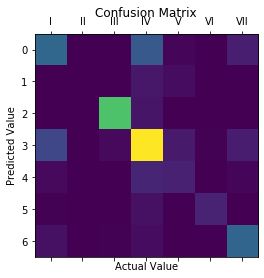

In [375]:
plt.matshow(cm)
plt.title('Confusion Matrix')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.xticks([0,1,2,3,4,5,6], ['I','II','III','IV','V','VI','VII'])

##### Auto Neural Network

In [376]:
nnclass3 = MLPClassifier(activation='relu', solver='sgd')
nnclass3.fit(steel_data_train_std, y_train)

nnclass3_pred = nnclass3.predict(steel_data_test_std)

print(metrics.classification_report(y_test, nnclass3_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

              precision    recall  f1-score   support

       Bumps       0.55      0.49      0.52       110
   Dirtiness       0.00      0.00      0.00        15
    K_Scatch       0.93      0.95      0.94       120
Other_Faults       0.64      0.72      0.67       215
      Pastry       0.45      0.49      0.47        37
      Stains       1.00      0.39      0.56        23
   Z_Scratch       0.67      0.75      0.71        63

    accuracy                           0.68       583
   macro avg       0.60      0.54      0.55       583
weighted avg       0.67      0.68      0.67       583



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [377]:
nnclass3.hidden_layer_sizes

(100,)

In [378]:
cm = metrics.confusion_matrix(y_test, nnclass3_pred)
print(cm)

[[ 54   0   0  42   2   0  12]
 [  0   0   0   8   7   0   0]
 [  0   0 114   6   0   0   0]
 [ 31   0   8 154  13   0   9]
 [  4   0   0  13  18   0   2]
 [  4   0   0  10   0   9   0]
 [  6   0   1   9   0   0  47]]
